# Projeto 1 - Ciência dos Dados

Nome: Augusto Rocha Ribeiro

**Atenção:** Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
#-------------------------------------Importando as bibliotecas necessárias-----------------------------------------------------

import pandas as pd
import os
import re 
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

**Em `filename`, coloque o nome do seu arquivo de dados!**

In [2]:
#### ----------------------------------Pegando o excel com as classificações manuais dos tweets-------------------------------------

filename = 'Havaianas.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo Havaianas.xlsx, tudo certo para prosseguir com o projeto!


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
#----------------------------------------Definindo Relevantes e Irrelevantes----------------------------------------------------

train = pd.read_excel(filename)
train_relevante = train[train['Classificação']==1]
train_irrelevante = train[train['Classificação']==0]

test = pd.read_excel(filename, sheet_name = 'Teste')
test_relevante = test[test['Classificação']==1]
test_irrelevante = test[test['Classificação']==0]


#------------------------------------------Classifica as categorias-------------------------------------------------------------

train['Classificação'] = train['Classificação'].astype('category')
test['Classificação'] = test['Classificação'].astype('category')

train.Classificação.cat.categories = ['Irrelevante', 'Relevante']
test.Classificação.cat.categories = ['Irrelevante', 'Relevante']

___
## Classificador automático de sentimento


Foram considerados relevantes os comentários que expressavam uma crítica sobre o produto, seja ela positiva ou negativa.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [18]:
# Função para retirada de caracteres indesejado:

def cleanup(text):
    punctuation = '[!-.:?;@/""“”,_]'
    pattern = re.compile(punctuation)
    text_pronto = re.sub(pattern, '', text)
    return text_pronto


# Função para retirada dos acentos nos textos:

def tira_acentos(texto):
    acentos = {'a':['á', 'à', 'ã', 'â', 'ä'], 'e':['ê', 'é', 'è', 'ë'], 'i':['í', 'ì', 'î', 'ï'], 'o':['ó', 'ò', 'ô', 'õ', 'ö'], 'u':['ú', 'ù', 'û', 'ü'], 'c':['ç']} 
    for l in acentos:
        for e in acentos[l]:
            texto = texto.replace(e, l)
    return texto


#----------------------------Cria uma string com todas as palavras e caracteres da parte de Treinamento-------------------------

tweets_train = ''
for i in range(len(train)):
    tweets_train += train['Treinamento'].loc[i] + ' '

train_limpo = tira_acentos(cleanup(tweets_train.lower()))    # Deixa a string somente com letras minúsculas, retira caracteres
                                                             # indesejados e retira os acentos das letras e palavras

lista_train = tweet_tokenizer.tokenize(train_limpo)    # Separa os emojis das palavras, e cria uma lista
                                                       # em que cada palavra ou emoji é um elemento            
           
tabela_t = pd.Series(lista_train).value_counts()       # Faz uma tabela com as frequências de cada palavra na lista acima

In [5]:
#----------------------------------Selecionando tweets de treinamento relevantes e irrelevantes---------------------------------

linhas_train_relev = train['Classificação'] == 'Relevante'
df_train_relev = train.loc[linhas_train_relev, :]

linhas_train_irrelev = train['Classificação'] == 'Irrelevante'
df_train_irrelev = train.loc[linhas_train_irrelev, :]

#------------------Juntando todos os tweets de treinamento relevantes e irrelevantes cada um numa só string---------------------

tweets_train_relev = ''
for i in df_train_relev['Treinamento']:
    tweets_train_relev += i

tweets_train_irrelev = ''
for i in df_train_irrelev['Treinamento']:
    tweets_train_irrelev += i

    
#----------------------------------Tornando as strings criadas acima em listas de palavras--------------------------------------

lista_train_relev = tweet_tokenizer.tokenize(tira_acentos(cleanup(tweets_train_relev.lower())))

lista_train_irrelev = tweet_tokenizer.tokenize(tira_acentos(cleanup(tweets_train_irrelev.lower())))

In [6]:
#------------------------------Frequências para os tweets de treino relevantes--------------------------------------------------

tabela_tra = pd.Series(lista_train_relev).value_counts()
tabela_trr = pd.Series(lista_train_relev).value_counts(True)

print('Frequência ABSOLUTA das palavras dos tweets RELEVANTES\n')
print(tabela_tra)

print('\n\nFrequência RELATIVA das palavras dos tweets RELEVANTES\n')
print(tabela_trr)   # tabela printada à título de consulta, pois não será usada posteriormente


#------------------------------Frequências para os tweets de treino irrelevantes------------------------------------------------

tabela_tia = pd.Series(lista_train_irrelev).value_counts()
tabela_tir = pd.Series(lista_train_irrelev).value_counts(True)

print('\n\nFrequência ABSOLUTA das palavras dos tweets IRRELEVANTES\n')
print(tabela_tia)

print('\n\nFrequência RELATIVA das palavras dos tweets IRRELEVANTES\n')
print(tabela_tir)   # tabela printada à título de consulta, pois não será usada posteriormente

Frequência ABSOLUTA das palavras dos tweets RELEVANTES

havaianas          127
de                  70
e                   63
uma                 43
a                   37
                  ... 
sola                 1
6338fmdudaasb        1
httpstcokyliygw      1
latarcioamparo       1
🤭                    1
Length: 755, dtype: int64


Frequência RELATIVA das palavras dos tweets RELEVANTES

havaianas          0.069857
de                 0.038504
e                  0.034653
uma                0.023652
a                  0.020352
                     ...   
sola               0.000550
6338fmdudaasb      0.000550
httpstcokyliygw    0.000550
latarcioamparo     0.000550
🤭                  0.000550
Length: 755, dtype: float64


Frequência ABSOLUTA das palavras dos tweets IRRELEVANTES

havaianas    120
de            93
e             73
que           43
a             37
            ... 
httpstcoe      1
canto          1
carnaval       1
te             1
gnt            1
Length: 1048, dtype: int

In [7]:
#-------------------------Limpando os tweets de teste e transformando-os em listas linha a linha--------------------------------

teste_em_listas = pd.DataFrame()

for i in range(len(test['Teste'])):
    teste_em_listas.loc[i, 'Teste'] = tira_acentos(cleanup(test['Teste'][i].lower()))
    teste_em_listas.loc[i, 'Teste'] = tweet_tokenizer.tokenize(teste_em_listas.loc[i, 'Teste'])

teste_em_listas['Classificação'] = test['Classificação']
teste_em_listas

,Teste,Classificação
0,"[joshnaku, delicia, perfeito, minecraft, chine...",Relevante
1,"[vendese, foto, dos, meus, pes, feios, com, ma...",Relevante
2,"[rt, ribeirod, 10, nao, vejo, a, hora, de, che...",Relevante
3,"[estou, indo, de, havaiana, eu, tem, problema,...",Relevante
4,"[menina, com, shorts, saia, e, havaianas, 🥰, 🥰...",Relevante
...,...,...
195,"[egirao, aeciodepapelao, mas, a, tv, e, uma, u...",Irrelevante
196,"[todo, mundo, q, for, vir, no, meu, aniversari...",Relevante
197,"[eu, prometi, pra, mim, mesmo, que, eu, nao, i...",Relevante
198,"[eu, sempre, tive, toque, com, havaianas, bran...",Irrelevante


In [8]:
# Explicação dos parâmetros usados nas seguintes funções:
#   tab_abs: tabela de frequências absolutas
#   lista_de_pal: lista de palavras que será usada
#   tab_tds_palavras: tabela que contém todas as palavras possíveis
#   tab_abs_rel: tabela de frequências absolutas para os tweets relevantes
#   tab_abs_irr: tabela de frequências absolutas para os tweets irrelevantes
#   lista_rel: lista de palavras dos tweets relevantes
#   lista_irr: lista de palavras dos tweets irrelevantes


# Função para realizar o cálculo de probabilidades das palavras

def probabilidade_tweet(tweet, tab_abs, lista_de_pal, tab_tds_palavras):
    prob = 1
    for palavra in tweet:
        if not palavra in tab_abs:                                      # Se a palavra de teste não consta em treinamento,
            prob = prob / (len(lista_de_pal) + len(tab_tds_palavras))   # então de acordo com a suavização de LaPlace
                                                                        # a probabilidade dessa palavra fica com numerador 1
        else:
            prob = prob * (tab_abs['%s'%(palavra)] + 1) / (len(lista_de_pal) + len(tab_tds_palavras))
    return prob


# Função que compara a probabilidade de ser relevante com não relevante e devolve a resposta:

def classifica(tweet, tab_abs_rel, tab_abs_irr, lista_rel, lista_irr, tab_tds_palavras):
    if probabilidade_tweet(tweet, tab_abs_rel, lista_rel, tab_tds_palavras) > probabilidade_tweet(tweet, tab_abs_irr, lista_irr, tab_tds_palavras):
        return 'Relevante'
    else:
        return 'Irrelevante'

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [9]:
#-------------------------------------Adicionando uma nova coluna ao dataframe Teste--------------------------------------------

teste_em_listas['Performance'] = 'NaN'
for i in range(len(teste_em_listas)):
    teste_em_listas.loc[i, 'Performance'] = classifica(teste_em_listas.loc[i, 'Teste'], tabela_tra, tabela_tia, lista_train_relev, lista_train_irrelev, tabela_t)
teste_em_listas


,Teste,Classificação,Performance
0,"[joshnaku, delicia, perfeito, minecraft, chine...",Relevante,Relevante
1,"[vendese, foto, dos, meus, pes, feios, com, ma...",Relevante,Relevante
2,"[rt, ribeirod, 10, nao, vejo, a, hora, de, che...",Relevante,Relevante
3,"[estou, indo, de, havaiana, eu, tem, problema,...",Relevante,Relevante
4,"[menina, com, shorts, saia, e, havaianas, 🥰, 🥰...",Relevante,Relevante
...,...,...,...
195,"[egirao, aeciodepapelao, mas, a, tv, e, uma, u...",Irrelevante,Relevante
196,"[todo, mundo, q, for, vir, no, meu, aniversari...",Relevante,Relevante
197,"[eu, prometi, pra, mim, mesmo, que, eu, nao, i...",Relevante,Relevante
198,"[eu, sempre, tive, toque, com, havaianas, bran...",Irrelevante,Relevante


In [10]:
#-------------------------------------Contando o percentual de acertos----------------------------------------------------------

contador = 0
for i in range(len(teste_em_listas)):
    if teste_em_listas.loc[i, 'Classificação'] == teste_em_listas.loc[i, 'Performance']:
        contador += 1
contador = contador / len(teste_em_listas)
    
contador

0.625

In [11]:
#------------------------Dashboard para análise de sentimento e visualização de dados-------------------------------------------

quadro = pd.crosstab(teste_em_listas['Classificação'], teste_em_listas['Performance'], margins = True, normalize = True)
quadro

Performance,Irrelevante,Relevante,All
Classificação,,,
Irrelevante,0.28,0.265,0.545
Relevante,0.11,0.345,0.455
All,0.39,0.610,1.000


Analisando a tabela acima, é possível ver que obtemos as seguintes porcentagens:
* Verdadeiros positivos (mensagens relevantes e que são classificadas como relevantes): 34,5%
* Falsos positivos (mensagens irrelevantes e que são classificadas como relevantes): 26,5%
* Verdadeiros negativos (mensagens irrelevantes e que são classificadas como irrelevantes): 28%
* Falsos negativos (mensagens relevantes e que são classificadas como irrelevantes): 11%

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

In [12]:
# Importando a biblioteca que será usada nessa seção do projeto:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [13]:
todos = pd.read_excel(filename, sheet_name = 'Todos')                # dataframe com os 500 tweets juntos
lista_percentuais = []                                   # lista que servirá para montar o histograma


# Abaixo, foi feita uma função que devolve o percentual de acertos para cada nova separação dos tweets entre
# Treinamento e Teste. Por essa função sintetizar o que foi trabalhado ao longo desse jupyter notebook,
# a maioria dos comandos nela presentes já foram explicados nas células acima.

def devolve_percentual_de_acertos(df):
    df_train, df_test = train_test_split(df, train_size=0.6)    # Separação de maneira aleatória dos tweets entre
                                                                # Treinamento e Teste, sendo que a parte de Treinamento
                                                                # fica com 60% dos tweets e a parte de Teste fica com 40%
    
    df_train = df_train.reset_index(drop=True)    # Resetando os índices das linhas do dataframe para facilitar a sua
    df_test = df_test.reset_index(drop=True)      # manipulação. Os índices nesse caso não são importantes.
    
    df_train_relevante = df_train[df_train['Classificação']==1]
    df_train_irrelevante = df_train[df_train['Classificação']==0]

    df_test_relevante = df_test[df_test['Classificação']==1]
    df_test_irrelevante = df_test[df_test['Classificação']==0]
    
    df_train['Classificação'] = df_train['Classificação'].astype('category')
    df_test['Classificação'] = df_test['Classificação'].astype('category')

    df_train.Classificação.cat.categories = ['Irrelevante', 'Relevante']
    df_test.Classificação.cat.categories = ['Irrelevante', 'Relevante']

    tweets_df_train = ''
    for i in range(len(df_train)):
        tweets_df_train += df_train['Tweet'].loc[i]

    df_train_limpo = tira_acentos(cleanup(tweets_df_train.lower()))
    lista_df_train = tweet_tokenizer.tokenize(df_train_limpo)
           
    tab_t = pd.Series(lista_df_train).value_counts()
    
    linhas_df_train_rel = df_train['Classificação'] == 'Relevante'
    df_train_rel = df_train.loc[linhas_df_train_rel, :]

    linhas_df_train_irr = df_train['Classificação'] == 'Irrelevante'
    df_train_irr = df_train.loc[linhas_df_train_irr, :]

    tweets_df_train_rel = ''
    for i in df_train_rel['Tweet']:
        tweets_df_train_rel += i

    tweets_df_train_irr = ''
    for i in df_train_irr['Tweet']:
        tweets_df_train_irr += i

    lista_df_train_rel = tweet_tokenizer.tokenize(tira_acentos(cleanup(tweets_df_train_rel.lower())))
    lista_df_train_irr = tweet_tokenizer.tokenize(tira_acentos(cleanup(tweets_df_train_irr.lower())))
    
    tab_tra = pd.Series(lista_df_train_rel).value_counts()
    tab_tia = pd.Series(lista_df_train_irr).value_counts()
    
    
    df_test_em_listas = pd.DataFrame()
    for i in range(len(df_test['Tweet'])):
        df_test_em_listas.loc[i, 'Tweet'] = tira_acentos(cleanup(df_test['Tweet'][i].lower()))
        df_test_em_listas.loc[i, 'Tweet'] = tweet_tokenizer.tokenize(df_test_em_listas.loc[i, 'Tweet'])
    df_test_em_listas['Classificação'] = df_test['Classificação']
    
    df_test_em_listas['Performance'] = 'NaN'
    for i in range(len(df_test_em_listas)):
        df_test_em_listas.loc[i, 'Performance'] = classifica(df_test_em_listas.loc[i, 'Tweet'], tab_tra, tab_tia, lista_df_train_rel, lista_df_train_irr, tab_t)
    
    percentual_de_acertos = 0
    for i in range(len(df_test_em_listas)):
        if df_test_em_listas.loc[i, 'Classificação'] == df_test_em_listas.loc[i, 'Performance']:
            percentual_de_acertos += 1
    percentual_de_acertos = percentual_de_acertos / len(df_test_em_listas)
    
    return percentual_de_acertos

In [14]:
# Repetindo a função definida acima 100 vezes para coletar valores de percentual
# de acertos e ir adicionando-os um a um na minha lista

for i in range(100):
    lista_percentuais.append(devolve_percentual_de_acertos(todos))

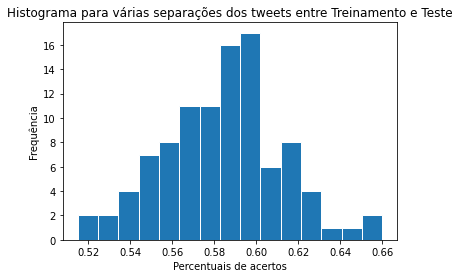

In [15]:
# Construção do histograma usando a lista com os percentuais de acertos para cada uma das 100 vezes em que a função
# "devolve_percentual_de_acertos()" foi executada, foram usadas 15 faixas nesse histograma.

plt.hist(lista_percentuais, bins=15, edgecolor='white')
plt.title('Histograma para várias separações dos tweets entre Treinamento e Teste')
plt.ylabel('Frequência')
plt.xlabel('Percentuais de acertos')
plt.show()

In [16]:
print('Porcentagem média de acertos do meu classificador:', (np.mean(lista_percentuais)*100).round(2), '%')

Porcentagem média de acertos do meu classificador: 58.4 %


# Concluindo

Considerando que o classificador teve uma porcentagem média de acertos de 58,46% (e de 62,5% na primeira tentativa), é correto dizer que ele teve uma performance moderada para boa. Para tal resultado, foram essenciais algumas manipulações, como a suavização de Laplace, remoção de caracteres indesejados (emojis são mantidos), correção de espaços entre palavras e emojis e entre os próprios emojis, e a remoção de acentos das letras, sendo a última, uma manipulação extra feita por mim, que se mostrou cabível para o caso, no qual os usuários não precisam escrever de acordo com a norma culta da língua portuguesa.

Embora tenha funções de bibliotecas do python que façam a remoção de acentos das letras, eu mesmo fiz a minha função porque funções como unidecode() além de retirar os acentos, também removem os emojis, o que não é o nosso foco nesse classificador. Então, o que foi feito na minha função foi identificar as letras que continham acentos e usar a função replace() para substituí-las pelas suas respectivas letras sem o acento. Os acentos considerados aqui foram o agudo, o circunflexo, o til, o grave e o trema para as vogais, e o cedilha para a letra "c".

Analisando a última tabela cruzada printada, vemos que a porcentagem de falsos positivos está bem maior que a de falsos negativos, a partir dessa informação, é importante nos perguntarmos e analisarmos se o nosso classificador está tendencioso a classificar os tweets como relevantes. Assim, é sempre importante reconhecer que ainda é possível realizar algumas melhorias no classificador em questão.

#### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste:
A partir do histograma plotado acima, é fundamental que vejamos, na construção de um classificador, a importância de se considerar várias divisões da base de dados em Treinamento e Teste, pois assim conseguimos ter uma maior noção sobre o valor para o qual o percentual de acertos do meu classificador tende. Não conseguir essa ampla visão da real performance do meu classificador, já que toda a avaliação deste acaba sendo feita com base em uma única separação dos tweets entre Treinamento e Teste, se mostra como uma grande desvantagem para a construção de um classificador que considera apenas uma única divisão da base de dados em treinamento e em teste.

## Dupla negação e sarcasmo

Duas características sintáticas da língua portuguesa que são mais passíveis de classificação incorreta por parte de classificadores é a dupla negação e o sarcasmo. Por serem particularidades sintáticas consagradas pelo uso, fica mais difícil atribuir ao classificador a "interpretação" necessária para compreendê-las.

Essas duas características provavelmente causariam mais confusão numa situação em que se busca classificar frases positivas e negativas sobre algo, pois em frases que contenham essas figuras da linguagem, o classificador identificaria as frases como uma categoria oposta (sendo "positivo" oposto de "negativo") ao que elas realmente são, justamente por causa das peculiaridades que a dupla negação e o sarcasmo apresentam.

No nosso caso, felizmente, essa confusão não se faz tão presente pois aqui o que almejamos não é classificar tweets em positivos e negativos sobre o produto, mas sim identificar tweets que fazem uma crítica sobre o produto, seja ela positiva ou negativa. Assim, obtém-se uma seção de tweets que contém exclusivamente feedbacks sobre o produto, excluindo os tweets que apenas o mencionam, sem sequer avaliá-lo em algum âmbito.

Para uma futura continuação desse projeto, aí então seria bem conveniente realizar a separação entre críticas positivas, negativas e mistas (que apresentam prós e contras). E ter em mãos um classificador que descarta comentários que não servem para a aprimoração do produto, como o que foi feito nesse projeto, seria extremamente útil. Logo, esse projeto deveria continuar sendo financiado, pois para a realização de uma análise mais focada e específica sobre o produto, grande parte do caminho já foi andado. Ao final dessa análise dos resultados devolvidos pelo classificador aperfeiçoado e otimizado, o entendimento de como se dá a relação dos consumidores com o produto nas diversas situações existentes se mostrará bem mais claro e organizado, permitindo ao fabricante mapear quais são as atitudes que devem ser tomadas para melhorar a performance do produto e a sua relação com os consumidores.

## Por que não posso alimentar minha base de treinamento automaticamente usando o próprio classificador, aplicado a novos tweets?

Na criação de classificadores, é bem importante que a questão acima seja levantada para que não haja erros no resultado final. Para respondê-la, temos que lembrar que o classificador é feito com base em um conjunto de tweets que são classificados a mão, tweet a tweet, esse conjunto é chamado de treinamento. Quando uma pessoa faz essa seleção manual dos tweets, está sendo criado no classificador um padrão, que é primariamente regido pela interpretação da pessoa que classificou os tweets, e ao alimentar a minha base de treinamento automaticamente usando o próprio classificador, restringe-se cada vez mais a base de treinamento a uma classificação padronizada dos tweets, que era adequada para a coleção inicial de tweets (classificada manualmente), especificamente para AQUELES tweets, mas que vai diminuindo a flexibilidade do classificador de categorizar novos casos a medida que se alimenta o classificador dessa maneira, em outras palavras, essa prática irá deixar o classificador VICIADO. Por isso não se deve alimentar as bases de treinamento dessa maneira.

## Diferentes cenários:

O classificador Naive-Bayes que fizemos nesse projeto pode atuar em diversas situações, seguem algumas delas:

* Classificação de artigos em um jornal, indicando o tema geral do artigo a partir dos jargões, manchetes e palavras usadas na notícia. 
* Classificação de e-mails, onde o classificador poderia identificar e-mails e separá-los como spam ou email importante a partir do assunto do email, links que este contém, endereço eletrônico do remetente e palavras usadas. Dividindo assim os emails e facilitando a vida do usuário.
* Classificação de artigos científicos em sites, identificando as palavras chave de cada matéria. Um exemplo seria um texto que contém o uso recorrente das palavras "integral" e "derivada", que com os filtros certos, seria identificado como um artigo de área de exatas. Da mesma maneira, um artigo com o uso da palavra "mitocôndria" seria provavelmente classificado como pertencente a área das ciências biológicas.
___
* O seguinte cenário de atuação do classificador Naive-Bayes foi retirado do site https://www.datageeks.com.br/naive-bayes/#:~:text=Classifica%C3%A7%C3%A3o%20com%20Naive%20Bayes,-Category%3A%20Machine%20Learning&text=O%20algoritmo%20%E2%80%9CNaive%20Bayes%E2%80%9D%20%C3%A9,provar%20a%20exist%C3%AAncia%20de%20Deus.

Um problema simples que exemplifica bem o teorema de Naive-Bayes é o cálculo de probabilidades em cima de diagnóstico de doenças.

Imagine que estamos trabalhando no diagnóstico de uma nova doença. Após realizar testes, coletas e análises com 100 pessoas distintas, descobrimos que 20 pessoas possuíam a doença e 80 pessoas estavam saudáveis. De todas as pessoas que possuíam a doença, 90% receberam Positivo no teste. Já 30% das pessoas que não possuíam a doença também receberam o teste positivo.

A partir destes dados, surge o problema:
###### Se uma nova pessoa realizar o teste e receber um resultado positivo, qual a probabilidade dela realmente possuir a doença?

Essa probabilidade a posteriori é resolvida pelo Naive Bayes. Para isso, é preciso multiplicar a probabilidade a priori (possuir a doença) pela probabilidade de “receber um resultado positivo, dado que tem a doença”. Com esses dados, também podemos calcular a probabilidade a posteriori da negação (não possuir a doença, dado que recebeu um resultado positivo).


## Melhorias:

Embora tenhamos atingido uma boa performance com o nosso classificador, podemos ainda apontar pontos que melhorariam tal performance. Alguns deles são:

* Aplicar filtros para descartar palavras que não serão úteis para o classificador, como conectivos, artigos, entre outros. Essa remoção de palavras inúteis poderia ser realizada no momento em que os tweets são transformados em listas de palavras. Evidente que tais palavras só podem ser consideradas como irrelevantes ou com relevância desprezível para o classificador após uma análise cautelosa do meu problema.
* Identificar polissemia (diferentes significados para a mesma palavra) e sinonímia (diferentes palavras para o mesmo significado) nos tweets, e para o último caso, buscar abordar também as gírias e abreviações comumente utilizadas na internet. Para ter maior noção nesse objetivo: https://repositorio.ufscar.br/bitstream/handle/ufscar/7903/LOCHTER_Johannes_2015.pdf?sequence=1&isAllowed=y
* Aprofundamento na análise do impacto causado nas probalidades de cada categoria pelos emojis, e saber as dimensões da intereferência desses elementos no meu projeto. Para saber mais: https://www.researchgate.net/profile/Leandro-De-Castro/publication/236161918_Uso_de_Emoticons_para_Analise_de_Sentimento_de_Tweets/links/00b49533d15fbd802d000000/Uso-de-Emoticons-para-Analise-de-Sentimento-de-Tweets.pdf
* Inserir mais categorias para melhorar a capacidade de categorização do classificador, como no lugar de "Tweets Relevantes", dividir entre "Tweets relevantes com críticas positivas" e "Tweets relevantes com críticas negativas". Para isso, seria preciso realizar mais classificações manuais na base de dados de treinamento do classificador para que este consiga compreender minimamente os dados e probabilidades relativos a cada categoria.
* Após o aumento de categorias mencionado acima, separar palavras que contenham sarcasmo e dupla negação. Para um melhor entendimento de como proceder nesses dois casos, seguem dois sites que tratam desses assuntos: http://www.each.usp.br/digiampietri/BraSNAM/2015/p12.pdf e http://repositorio.unicamp.br/bitstream/REPOSIP/260283/1/Silva_PauloSergioda_D.pdf


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://pypi.org/project/Unidecode/

https://www.normaculta.com.br/dupla-negacao/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.datageeks.com.br/naive-bayes/#:~:text=Classifica%C3%A7%C3%A3o%20com%20Naive%20Bayes,-Category%3A%20Machine%20Learning&text=O%20algoritmo%20%E2%80%9CNaive%20Bayes%E2%80%9D%20%C3%A9,provar%20a%20exist%C3%AAncia%20de%20Deus.